In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [276]:
data = pd.read_csv("credit_card_data.csv")
data.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,NaN,1,29.50000,3.9600,0.044438,137.869200,yes,no,0,168,1,22
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6


In [277]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1308 non-null   object 
 1   reports      1320 non-null   int64  
 2   age          1320 non-null   float64
 3   income       1320 non-null   float64
 4   share        1320 non-null   float64
 5   expenditure  1320 non-null   float64
 6   owner        1320 non-null   object 
 7   selfemp      1320 non-null   object 
 8   dependents   1320 non-null   int64  
 9   months       1320 non-null   int64  
 10  majorcards   1320 non-null   int64  
 11  active       1320 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.9+ KB


# Checking for missing values
This specific column is target so we better drop those observations




In [278]:
data.isna().sum()

card           12
reports         0
age             0
income          0
share           0
expenditure     0
owner           0
selfemp         0
dependents      0
months          0
majorcards      0
active          0
dtype: int64

In [279]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1308 non-null   object 
 1   reports      1308 non-null   int64  
 2   age          1308 non-null   float64
 3   income       1308 non-null   float64
 4   share        1308 non-null   float64
 5   expenditure  1308 non-null   float64
 6   owner        1308 non-null   object 
 7   selfemp      1308 non-null   object 
 8   dependents   1308 non-null   int64  
 9   months       1308 non-null   int64  
 10  majorcards   1308 non-null   int64  
 11  active       1308 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 132.8+ KB


# Let's observe our numeric variables¶


In [280]:
data.describe()


,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,0.460245,33.217253,3.363475,0.068709,185.406943,0.993884,55.389144,0.816514,6.994648
std,1.350262,10.160253,1.674635,0.094787,273.076284,1.249315,66.456634,0.387213,6.297214
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.250000,0.002208,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038811,101.280400,0.500000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093636,248.970800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,12.499900,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


# In order to ease our classification we can change 'card' column to 0 and 1

In [281]:
data.card=data.card.map({'yes':1,'no':0})

In [282]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
4,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


# Lets plot a barplot, counting observations from our two classes to examine if our dataset is balanced or not
Heavily imbalanced datasets may prove insufficient to train a model. There are many cases that minority class has such small number of observations that cannot ‘’teach’’ an algorithm to predict it or let the model be biased towards the majority class.

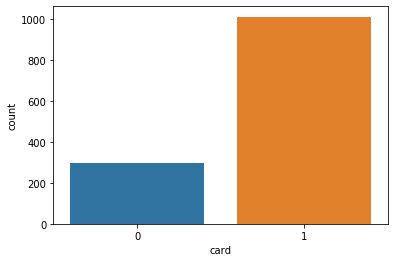

In [283]:
sns.countplot(x=data['card'])
plt.show()

# Checking for outliers

- Outliers can have a significant impact on the performance and results of logistic regression models.
- Ploting boxplots for numeric columns will let us know if there are a lot outliers in our dataset.




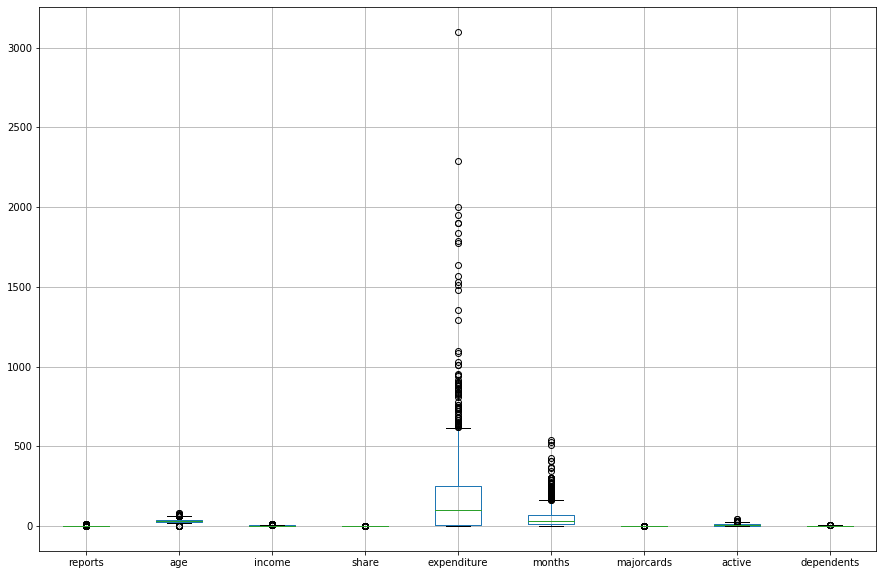

In [284]:
numeric_columns=['reports', 'age', 'income', 'share' , 'expenditure', 'months', 'majorcards','active','dependents']

boxplot = data.boxplot(column=numeric_columns,figsize=(15,10))


#### Seems that 'expenditure' and 'months' variables have a lot of outliers. There are also a few outliers in other columns too. When we conclude which columns we will use we will remove those observations.

# To examine correlated variables we will create Correlation Heatmap


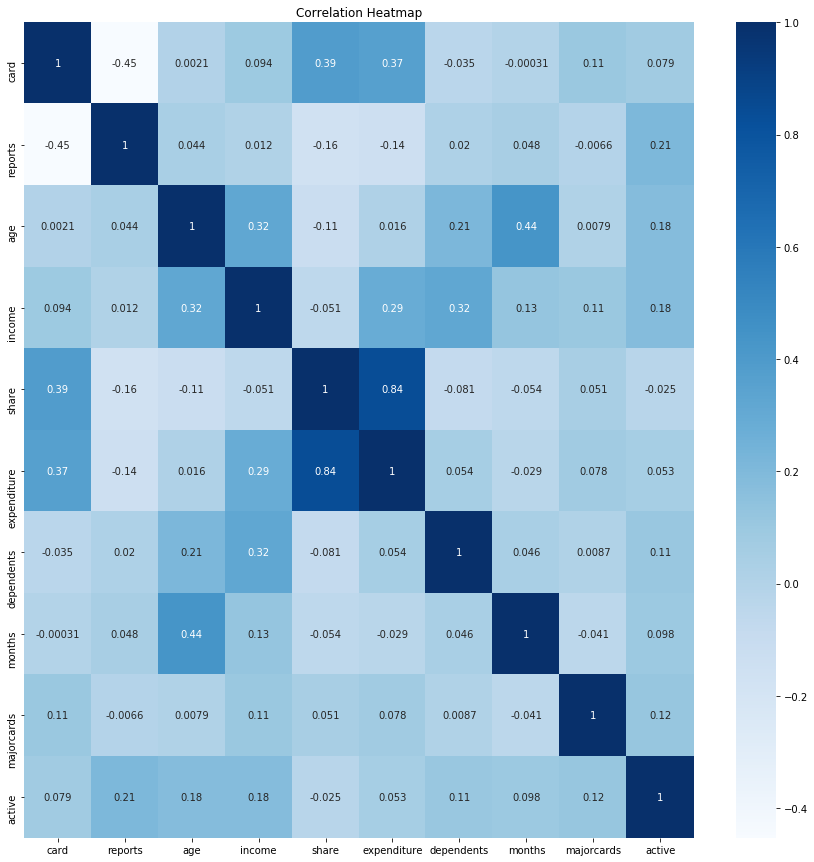

In [285]:
plt.figure(figsize=(15, 15))
plt.title("Correlation Heatmap")
heatmap = sns.heatmap(data.corr(), annot=True, cmap="Blues")


### Variables 'expenditure' and 'share' look heavily corralated. This was expected from our data definition! Share is defined as: 'Ratio of monthly credit card expenditure to yearly income

### Additionaly 'expenditure' looks suspicious in general.
Is it the expediture from those customers generated from other cards or is it the expediture generated from the card whose application we examine?

### To anwser we will examine if there is significant differance between the expenditures of customers whose application was approved and and those rejected.

In [286]:
expenditures_cardholders = data.expenditure[data.card == 1]
expenditures_noncardholders = data.expenditure[data.card == 0]

print('Fraction of customers who were approved and had no expenditures: %.2f' % ((expenditures_cardholders == 0).mean()))
print('Fraction of customers who were rejected and had no expenditures: %.2f' % ((expenditures_noncardholders == 0).mean()))

Fraction of customers who were approved and had no expenditures: 0.02
Fraction of customers who were rejected and had no expenditures: 1.00


### As observed 0 expenditures had almost only 'rejected' cumstomers. It seems that a few 'approved' had also 0 expenditures but this can be easily justified by the nature of data. Our hypothesis is further established from the fact that ALL rejected customers appear to have 0 expenditures.

This is indicative of a very common phenomenon named 'data leakage'. Very often datasets incude data that was not existent at the moment of the decision but were generated later. Those variables HAVE TO BE EXCLUDED from the model. A model would learn to predict 'rejected' only by expenditures=0 and it could be very accurate for the dataset but very naive for the real world.

### For this reason 'expenditure' column will be droped from our model. Additionaly 'share' variable will be also excluded because is heavily correlated to 'expenditures' as expected by our data definition.

In [287]:
data.drop(['expenditure', 'share'], axis='columns', inplace=True)


# To further proceed we will drop outliers. (observations further than 3 standard deviations). Then we examine again our target variable distribution to see how it changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184 entries, 0 to 1319
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   card        1184 non-null   int64  
 1   reports     1184 non-null   int64  
 2   age         1184 non-null   float64
 3   income      1184 non-null   float64
 4   owner       1184 non-null   object 
 5   selfemp     1184 non-null   object 
 6   dependents  1184 non-null   int64  
 7   months      1184 non-null   int64  
 8   majorcards  1184 non-null   int64  
 9   active      1184 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 101.8+ KB


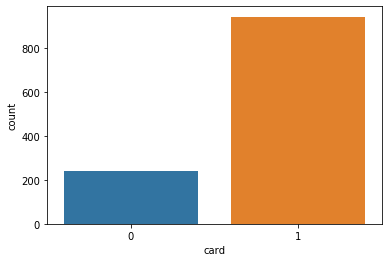

In [288]:
numeric_columns=['reports', 'age', 'income', 'months', 'majorcards','active','dependents']

for column in numeric_columns:
    data=data[np.abs(data[column]-data[column].mean())<=(3*data[column].std())]

data.info()
sns.countplot(x=data['card'])

# Variables 'owner' and 'selfemp' are categorical. We can transform them with dummies or as booleans so we can include them in our model.

This time we proceed with dummies just for academic-demonstration puproses. For variables containing only two categories we could also proceed with turning them to boolean like we did with the 'card' column. For categorical variables with more than two categories using dummies is mandatory.

In [289]:
data=pd.get_dummies(data,columns={'owner','selfemp'})


In [290]:
data.head()


,card,reports,age,income,dependents,months,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes
0,1,0,37.66667,4.52,3,54,1,12,0,1,1,0
1,1,0,33.25000,2.42,3,34,1,13,1,0,1,0
2,1,0,33.66667,4.50,4,58,1,5,0,1,1,0
4,1,0,30.50000,2.54,0,25,1,7,1,0,1,0
6,1,0,23.25000,2.50,0,54,1,1,1,0,1,0


# Logistic regression

In [291]:
X = data.drop('card', axis=1)
y = data['card']
X_or_train, X_or_test, y_or_train, y_or_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

lr = LogisticRegression(max_iter=300)
lr_or = lr.fit(X_or_train, y_or_train)

y_pred = lr.predict(X_or_test)
print(classification_report(y_or_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.36      0.44        42
           1       0.87      0.94      0.91       195

    accuracy                           0.84       237
   macro avg       0.72      0.65      0.67       237
weighted avg       0.82      0.84      0.82       237



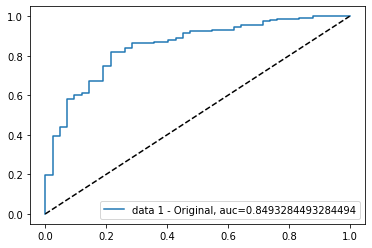

In [292]:
y_pred_proba_log = lr.predict_proba(X_or_test)[::,1]

fpr_log,tpr_log,_ = roc_curve(y_or_test,y_pred_proba_log)
auc_log= roc_auc_score(y_or_test,y_pred_proba_log)

plt.plot(fpr_log, tpr_log, label= "data 1 - Original, auc=" +str(auc_log))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# As mentioned, dataset is imbalanced. We will examine if balancing our dataset is a good idea.

In [293]:
data.card.value_counts()


1    943
0    241
Name: card, dtype: int64

# Downsampling

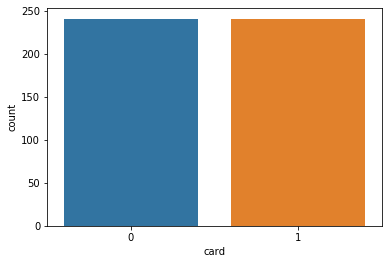

In [294]:
data_2 = (data.groupby('card', as_index=False)
        .apply(lambda x: x.sample(n=241))
        .reset_index(drop=True))

sns.countplot(x=data_2['card'])

# We are now ready to create our balanced X and y datasets and retrain our model

In [295]:
X_und = data_2.drop('card', axis=1)

y_und = data_2['card']

X_und_train, X_und_test, y_und_train, y_und_test = train_test_split(
    X_und, y_und, test_size=0.2, random_state=42, shuffle=True)

lr = LogisticRegression(max_iter=10000)
lr = lr.fit(X_bal_train, y_bal_train)

y_pred = lr.predict(X_und_test)
print(classification_report(y_und_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.81      0.81      0.81        47

    accuracy                           0.81        97
   macro avg       0.81      0.81      0.81        97
weighted avg       0.81      0.81      0.81        97



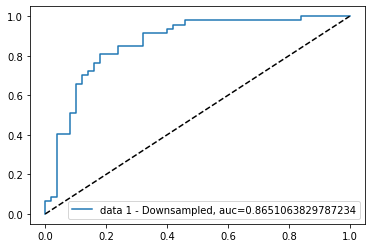

In [296]:
y_pred_proba = lr.predict_proba(X_und_test)[::,1]

fpr_und,tpr_und,_ = roc_curve(y_und_test,y_pred_proba)
auc_und= roc_auc_score(y_und_test,y_pred_proba)

plt.plot(fpr_und, tpr_und, label= "data 1 - Downsampled, auc=" +str(auc_und))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# An other way to handle unbalanced data is to let the model know that our data are stratified. Passing this argument when spliting data will let the model adjust weights towards the minority class.

In [297]:
X_str = data.drop('card', axis=1)
y_str = data['card']

X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(
    X_str,
    y_str,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y_original)

lr = LogisticRegression(max_iter=300)
lr = lr.fit(X_train_str, y_train_str)

y_pred = lr.predict(X_test_str)
print(classification_report(y_test_str, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        48
           1       0.88      0.97      0.93       189

    accuracy                           0.88       237
   macro avg       0.86      0.74      0.78       237
weighted avg       0.87      0.88      0.87       237



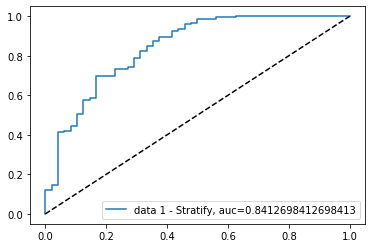

In [298]:
y_pred_proba_str = lr.predict_proba(X_test_str)[::,1]

fpr_str,tpr_str,_ = roc_curve(y_test_str,y_pred_proba_str)
auc_str= roc_auc_score(y_test_str,y_pred_proba_str)

plt.plot(fpr_str, tpr_str, label= "data 1 - Stratify, auc=" +str(auc_str))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# class_weight = 'balanced'

In [299]:
X_bal = data.drop('card', axis=1)
y_bal = data['card']

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_bal, y_bal, test_size =0.25, random_state=0)
logreg_bal = LogisticRegression(max_iter=10e5, class_weight = 'balanced')
logreg_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = logreg_bal.predict(X_test_bal)
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

           0       0.49      0.65      0.56        62
           1       0.90      0.82      0.86       234

    accuracy                           0.79       296
   macro avg       0.70      0.73      0.71       296
weighted avg       0.81      0.79      0.80       296



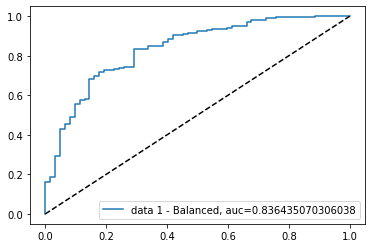

In [300]:
y_pred_proba_bal = lr.predict_proba(X_test_bal)[::,1]

fpr_bal,tpr_bal,_ = roc_curve(y_test_bal,y_pred_proba_bal)
auc_bal= roc_auc_score(y_test_bal,y_pred_proba_bal)

plt.plot(fpr_bal, tpr_bal, label= "data 1 - Balanced, auc=" +str(auc_bal))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

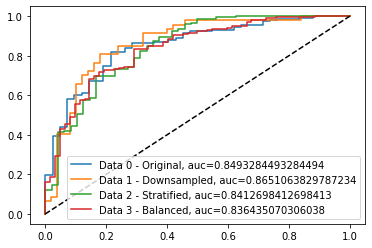

In [301]:
plt.plot(fpr_log, tpr_log, label= "Data 0 - Original, auc=" +str(auc_log))
plt.plot(fpr_und, tpr_und, label= "Data 1 - Downsampled, auc=" +str(auc_und))
plt.plot(fpr_str, tpr_str, label= "Data 2 - Stratified, auc=" +str(auc_str))
plt.plot(fpr_bal, tpr_bal, label= "Data 3 - Balanced, auc=" +str(auc_bal))

plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# Undersampling with RandomUnderSampler

In [302]:
X = data.drop('card',axis=1)
y = data['card']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rus = RandomUnderSampler(random_state=19)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_resampled)

print(classification_report(y_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       199
           1       0.75      0.77      0.76       199

    accuracy                           0.76       398
   macro avg       0.76      0.76      0.76       398
weighted avg       0.76      0.76      0.76       398



# Oversampling with SMOTE

In [303]:
X = data.drop('card',axis=1)
y = data['card']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=5)
X_resampled1, y_resampled1 = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_resampled1, y_resampled1)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.79      0.54        42
           1       0.94      0.75      0.84       195

    accuracy                           0.76       237
   macro avg       0.67      0.77      0.69       237
weighted avg       0.85      0.76      0.78       237



# SMOTETomek (Combination of UnderSampling and OverSampling)


In [304]:
X = data.drop('card', axis=1)
y = data['card']

X, y = make_classification(
    n_samples=1000, n_features=X.shape[1], n_informative=2,
    n_redundant=0, n_clusters_per_class=1, weights=[0.9], random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_c = sc.fit_transform(X_train_c)
X_test_c = sc.transform(X_test_c)
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_res, y_res)

y_pred = logreg.predict(X_test_c)

classification_results = classification_report(y_test_c, y_pred)
confusion_results = confusion_matrix(y_test_c, y_pred)

print(classification_results)

              precision    recall  f1-score   support

           0       0.93      0.39      0.55       180
           1       0.12      0.75      0.21        20

    accuracy                           0.43       200
   macro avg       0.53      0.57      0.38       200
weighted avg       0.85      0.43      0.52       200



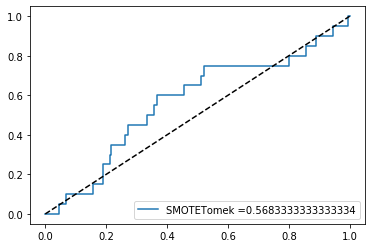

In [305]:
y_pred_proba_comb = logreg.predict_proba(X_test_c)[::,1]

fpr_comb,tpr_comb,_ = roc_curve(y_test_c,y_pred_proba_comb)
auc_comb= roc_auc_score(y_test_c,y_pred_proba_comb)

plt.plot(fpr_comb, tpr_comb, label= "SMOTETomek =" +str(auc_comb))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# Finding the top-3 most significant variables



In [306]:
X = data.drop('card', axis=1)
y = data['card']
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.368476
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.271     
Dependent Variable:     card                AIC:                 892.5511  
Date:                   2023-06-08 01:35    BIC:                 943.3177  
No. Observations:       1184                Log-Likelihood:      -436.28   
Df Model:               9                   LL-Null:             -598.25   
Df Residuals:           1174                LLR p-value:         2.1437e-64
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
             Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
---------------------------------------------------------------------------
reports     -1.86

- P-value ≤ α: The association is statistically significant.
- P-value > α: The association is not statistically significant
### In our case for an a= 0.05 we will continue only with 'reports', 'income' and 'active' variables

In [307]:
cols = ['reports', 'income', 'active']
X = data[cols]
y = data['card']

X_new_train_str, X_new_test_str, y_new_train_str, y_new_test_str = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y_original)

lr = LogisticRegression(max_iter=300)
lr = lr.fit(X_new_train_str, y_new_train_str)


y_true, y_pred = y_new_test_str, lr.predict(X_new_test_str)
print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.85      0.46      0.59        48
           1       0.88      0.98      0.92       189

    accuracy                           0.87       237
   macro avg       0.86      0.72      0.76       237
weighted avg       0.87      0.87      0.86       237

